# Dimensionality reduction analysis

After applying the different clustering algorithms, we now look at ways to improve the obtained results. One way to do so is by applying dimension reduction techniques such as Principal Component Analysis (PCA) and Canonical Correlation Analysis (CCA).


**<font color='red'>PCA:</font>** This method is used to reduced the dimensions of the data. In fact, sometimes we have variables that do not give any information about the data and thus removing these variables can lead to better results.  

**<font color='red'>CCA:</font>** This method is used to detect correlations between different subgroups of data. In fact, sometimes we have variables that are so strongly correlated that reducing the dimensions using linear combinations between the correlated variables can imporove the results
It is **important to note that we will NOT use the labels when applying PCA and CCA.**

___




## Mount Drive

**For google colab users only**

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

# Change to the directory to where your files are
os.chdir('drive/MyDrive/TD4')



Mounted at /content/drive


## Import Libraries

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelEncoder

## Load the dataset, separate data from classes



Load the dataset you are using in your project and separate the data from the class.

**<font color='red'>N.B:</font>** If you have applied some preprocessing steps (missing value replacement, factorize), please used the dataset you obtained after all the steps (you should have saved your dataset in notebook TD2_3.ipynb) without the normalization step.





In [ ]:
df = pd.read_csv('spotipyMusicGenres.csv', header=0)
data=df.drop(["genre","ids","song"],axis=1)
labels=df[["genre"]]
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data['artist'] = pd.factorize(data['artist'])[0]
data

,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
0,0,0.72000,0.629,298933,0.547,0.003140,10,0.0604,-13.123,0.0550,108.375,0,0.197
1,1,0.00121,0.352,222973,0.911,0.000000,1,0.0995,-5.230,0.0747,148.033,1,0.236
2,2,0.00287,0.526,253587,0.866,0.000078,0,0.0945,-5.822,0.0568,140.266,1,0.248
3,3,0.00438,0.480,297933,0.870,0.006030,1,0.0826,-4.792,0.0362,161.953,1,0.584
4,4,0.06950,0.685,167614,0.738,0.000000,8,0.1280,-4.413,0.0595,112.972,1,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,112,0.00226,0.721,154983,0.738,0.000004,7,0.1180,-4.770,0.0403,119.976,1,0.637
246,116,0.00294,0.501,190846,0.765,0.490000,6,0.1840,-7.063,0.0281,91.771,0,0.460
247,117,0.29600,0.674,178480,0.881,0.000003,9,0.0793,-2.853,0.1470,98.994,1,0.234
248,113,0.04040,0.677,152913,0.744,0.000160,10,0.0740,-6.806,0.0295,124.080,0,0.631


## Part 1: Apply PCA


##### We start by scaling the data so that each feature has a single unit variance.  


**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale both continuous and numerical variables.
PCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

In [ ]:
# Use StandardScaler
from sklearn.preprocessing import StandardScaler,LabelEncoder
# instanciate scaler object
scaler = StandardScaler()

# fit scaler to our data
scaler.fit(data)

# scale our data
x_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(x_scaled, columns=data.columns)
data_scaled

,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
0,-1.785346,1.041974,0.295349,1.011195,-0.091078,-0.513893,1.287656,-0.811310,-0.263009,-0.240240,-0.353754,-1.333333,-1.112988
1,-1.754457,-0.927958,-1.313484,-0.112706,1.199020,-0.522657,-1.227298,-0.442531,0.593970,0.045146,1.197124,0.750000,-0.957582
2,-1.723569,-0.923408,-0.302881,0.340258,1.039530,-0.522439,-1.506737,-0.489690,0.529694,-0.214164,0.893385,0.750000,-0.909765
3,-1.692681,-0.919270,-0.570052,0.996399,1.053707,-0.505827,-1.227298,-0.601927,0.641526,-0.512587,1.741484,0.750000,0.429116
4,-1.661792,-0.740801,0.620601,-0.931794,0.585869,-0.522657,0.728778,-0.173728,0.682676,-0.175050,-0.173983,0.750000,1.289826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.674148,-0.925080,0.829691,-1.118682,0.585869,-0.522644,0.449338,-0.268045,0.643914,-0.453192,0.099918,0.750000,0.640309
246,1.797701,-0.923216,-0.448083,-0.588055,0.681563,0.844960,0.169899,0.354447,0.394953,-0.629928,-1.003076,-1.333333,-0.064995
247,1.828589,-0.120050,0.556712,-0.771022,1.092693,-0.522648,1.008217,-0.633051,0.852052,1.092525,-0.720611,0.750000,-0.965552
248,1.705036,-0.820553,0.574136,-1.149310,0.607134,-0.522210,1.287656,-0.683039,0.422857,-0.609647,0.260410,-1.333333,0.616400



##### We then instantiate a PCA object.

The main parameter of this method is the max number of components. In this project, we will choose it to be equal to the max number of variables in the data.


In [ ]:
from sklearn.decomposition import PCA

# instanciate a PCA object
pca = PCA(n_components=13)

# fit the object to our data
pca.fit(data_scaled)

# apply PCA to our data to get new coordinates
data_pca = pca.transform(data_scaled)



### Interpreting the components

The next step is to choose the number of components to keep.

##### Plot the explained variance of each component using the corrected variance.

In [ ]:
# Explained variance (eigenvalues)
print("Explained variance")
print(pca.explained_variance_)

# Corrected variance values
n = len(data_pca) # number of samples
corrected_variance = (n/(n-1))*pca.explained_variance_
print("\nCorrected variance")
print(corrected_variance)

Explained variance
[4.76560856 1.54220431 1.14485729 1.02402831 0.96830746 0.84287617
 0.82726123 0.64396414 0.51971484 0.39361134 0.17729331 0.13930981
 0.06317206]

Corrected variance
[4.78474755 1.54839791 1.14945511 1.02814087 0.97219624 0.84626122
 0.83058356 0.64655034 0.52180204 0.39519211 0.17800534 0.13986929
 0.06342577]


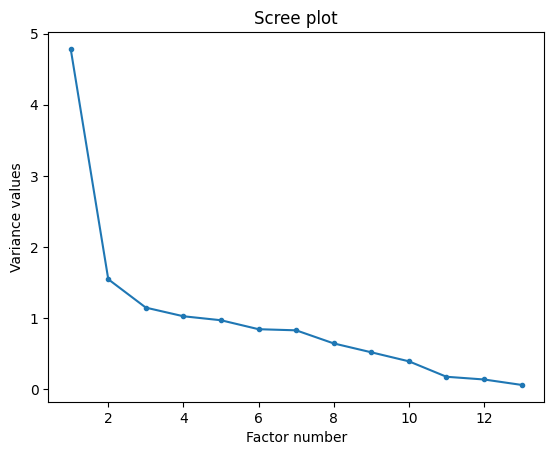

In [ ]:
# plot the explained variance of each component
p = data_pca.shape[1] # number of components
plt.plot(np.arange(1,p+1),corrected_variance, marker='.')
plt.title("Scree plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

##### Plot the cumulative variance of the components based on the explained variance ratio.

In [ ]:
pca.explained_variance_ratio_*100

array([36.51189327, 11.81565767,  8.77136819,  7.84563229,  7.41872482,
        6.45772821,  6.33809372,  4.93375603,  3.9818152 ,  3.0156684 ,
        1.35833954,  1.06732746,  0.4839952 ])

In [ ]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 36.51189327,  48.32755093,  57.09891912,  64.94455141,
        72.36327623,  78.82100444,  85.15909816,  90.09285419,
        94.07466939,  97.0903378 ,  98.44867734,  99.5160048 ,
       100.        ])

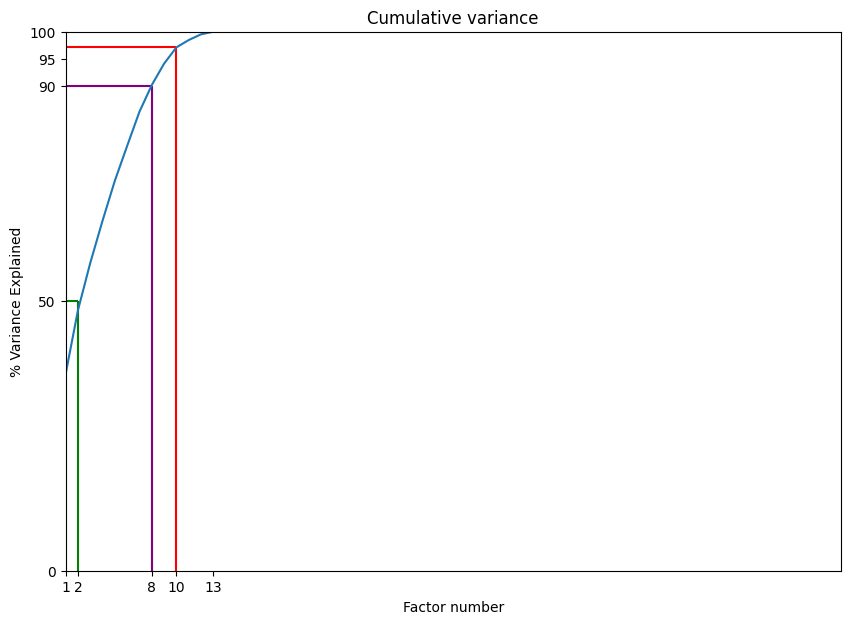

In [ ]:
# plot the cumulative variance
plt.figure(figsize=(10,7))
plt.title("Cumulative variance")
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')

plt.hlines(y=97.09, xmin=0, xmax=10, color='red')
plt.vlines(x=10.0, ymin=0, ymax=97.09,color='red')

plt.hlines(y=90.0,xmin=0, xmax=8, color='purple')
plt.vlines(x=8.0, ymin=0, ymax=90, color='purple')

plt.hlines(y=50.0, xmin=0, xmax=2, color='green')
plt.vlines(x=2.0,ymin=0, ymax=50, color='green')

plt.ylim(0,100)
plt.xlim(1,64)
plt.yticks([0,50,90,95,100])
plt.xticks([1,2,8,10,13])
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)
plt.show()

##### How many components will you keep? Explain your choice.
<p> We will keep 8 components

In [ ]:
datapca = data_pca[:,:8]
print(datapca.shape)
#we kept 8 because with 8 components we have more that 90% of cumulated variance

(250, 8)


**Note:** If you do choose to keep all components in your analysis, you do not perform any dimension reduction.

##### Create your reduced dimensionality dataset by only keeping the components you chose to keep in the above question.

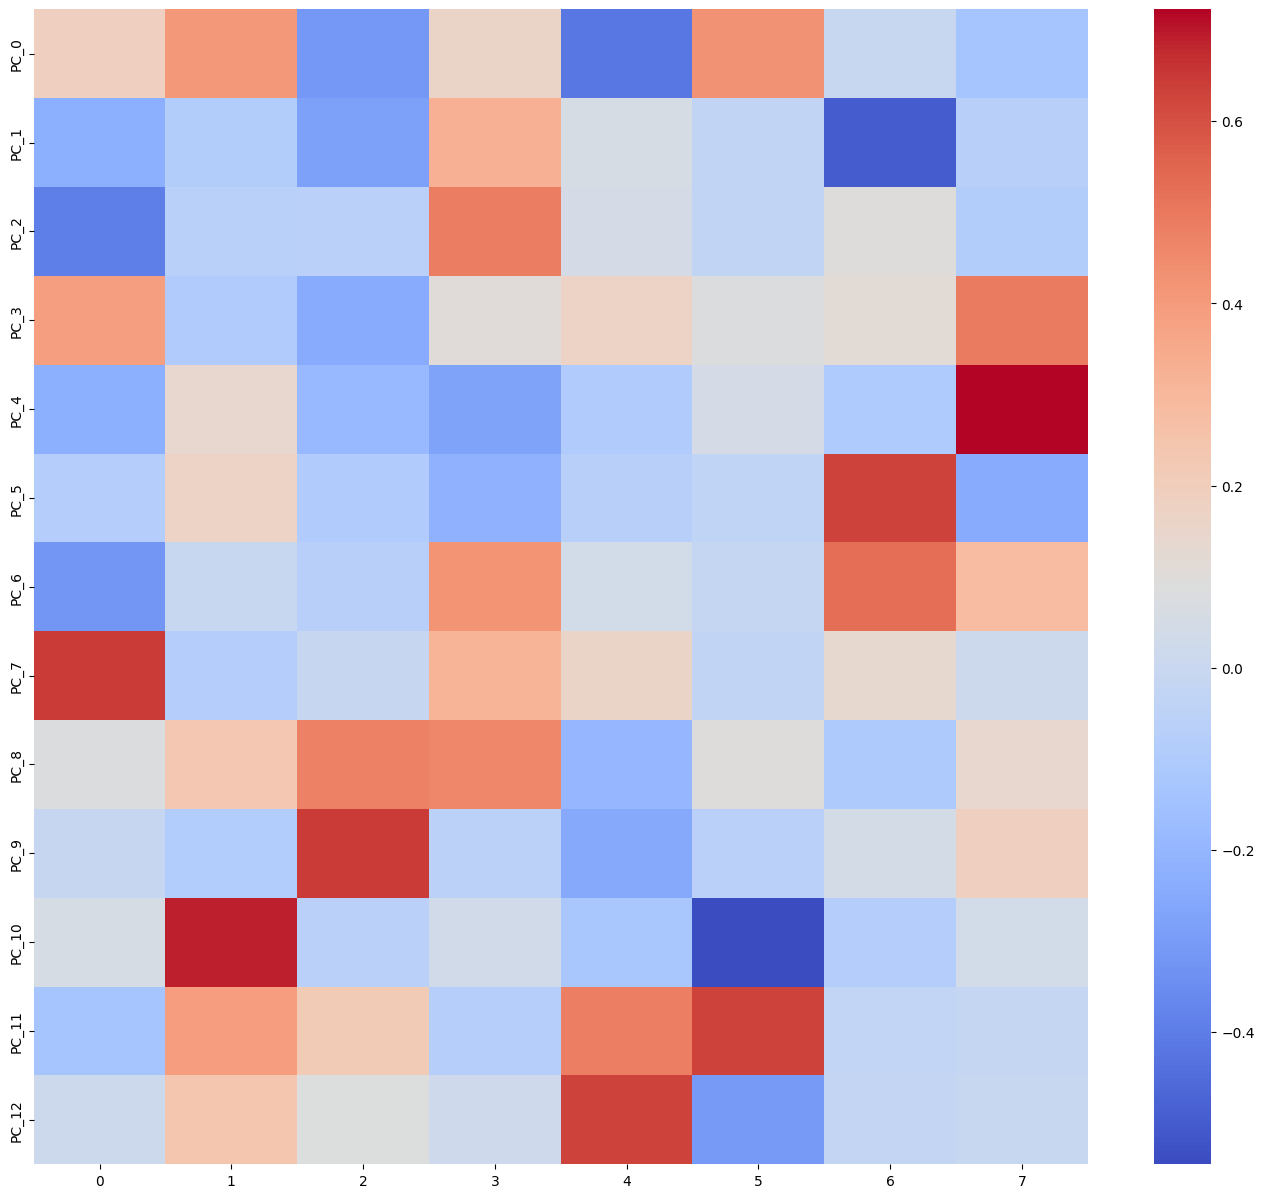

In [ ]:
components = pd.DataFrame(pca.components_[:,:8], index=[f"PC_{i}" for i in range(len(pca.components_[:,:8]))])

plt.figure(figsize=(17,15))
sns.heatmap(components,cmap='coolwarm',)
plt.show()

##### What is the inertia percentage explained by the components you kept *(le pourcentage d’inertie expliquée par le premier axe factoriel)*?

What does it mean?

In [ ]:
#The percentage of inertia is 90.092% is represented by the cumulated variance of the 8 components chosen

##### Calculate the contribution of the first individual to the first component *(la contribution du premier individu au premier axe factoriel)*.

In [ ]:
contribution=(((datapca[0,0]**2)/pca.explained_variance_[0])/8)
#The contribution of the first individual


print(contribution)

0.009122617805374721


##### Calculate the quality of representation of this individual in the map made of the first factorial axis *(la qualité de représentation de cet individu dans le plan constitué du premier axe factoriel)*.

What can you deduce?

In [ ]:
cos2 = datapca**2
di = np.sum(data_scaled**2,axis=1)
j=0
cos2[:,j] = cos2[:,j]/di
df_ctr_12 = pd.DataFrame({'individue':df.index,'qualité de representation sur l epremier axe':cos2[:,0]})
df_ctr_12.head(1)
#here we calculate the quality of representation of the individual to the firt factorial axis which is cos2_1
#source https://www.kaggle.com/code/zoupet/acp-classification-correction/notebook


,individue,qualité de representation sur l epremier axe
0,0,0.030943


### Variable representation

#### Compute the correlation between the principal components and the variables

##### Print the correlation matrix.

In [ ]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Print the correlation matrix "variables x factors"
print(corvar)

[[ 0.4199313  -0.28871788 -0.42174473  0.3916644  -0.22531062 -0.07390535
  -0.29267192  0.51836942  0.05761893 -0.007759    0.02358868 -0.05041109
   0.00314507]
 [ 0.88844989 -0.10974644 -0.06998949 -0.09737386  0.13902581  0.15913994
  -0.0086971  -0.06554323  0.1709176  -0.05779787  0.29199124  0.14744329
   0.06085638]
 [-0.69065267 -0.3536064  -0.06820844 -0.25034748 -0.18434116 -0.08780037
  -0.06781454 -0.01015632  0.34452206  0.40748381 -0.02578094  0.08001487
   0.0220304 ]
 [ 0.34728125  0.4091574   0.52053671  0.10796557 -0.2736757  -0.19874274
   0.38574217  0.25110808  0.32983992 -0.03663767  0.01435811 -0.02823175
   0.00547221]
 [-0.91235005  0.06855444  0.04945131  0.17462587 -0.0967026  -0.06748108
   0.03393292  0.13079975 -0.14232921 -0.15824124 -0.05204908  0.18064583
   0.15881211]
 [ 0.93412304 -0.04324449 -0.03603067  0.08248939  0.0483951  -0.0346105
  -0.01599111 -0.02629438  0.06910589 -0.03922301 -0.23003186  0.23621155
  -0.07731693]
 [-0.01651927 -0.617716

##### Plot the correlation circle

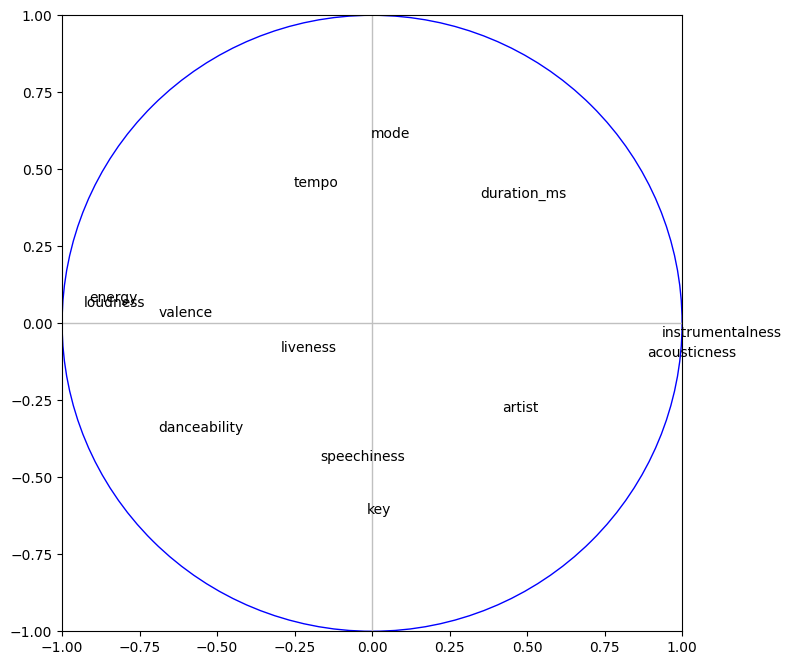

In [ ]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))
# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

##### Interpret the obtained results

In [ ]:

#In ths circle we can see that the correlated variables are :
#-  loudness and energy
#-acousticness and instrumentalness

#and the most representative ones are :
#-loudness
#-energy
#-acousticness
#-instrumentalness

## Applying clustering on the newly created dataset.

Recall in TD2_3.ipynb, you applied different clustering algorithms on your dataset and analyzed which method gave the best results on your dataset.

##### Apply this clustering method to the dataset you obtained after applying PCA and performing dimension reduction.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics



kmeans = KMeans(n_clusters=5,max_iter=5000)
k1=kmeans.fit(datapca)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Using the same metrics you used in TD2_3.ipynb, compare the results obtained with this method to the real classes.

In [ ]:
k1=kmeans.fit(datapca)

print(k1.labels_)
var = pd.Series(k1.labels_).value_counts()
print(var)
print(metrics.completeness_score(labels,k1.labels_))
print(metrics.v_measure_score(labels,k1.labels_))
print(metrics.homogeneity_score(labels,k1.labels_))
print(metrics.adjusted_rand_score(labels,k1.labels_))
print(metrics.rand_score(labels,k1.labels_))

[2 4 4 4 2 2 2 2 2 4 2 2 2 2 0 4 4 2 2 4 2 4 2 4 4 2 2 1 2 2 4 4 0 2 0 2 4
 1 2 2 2 2 4 2 4 2 2 2 4 2 1 2 4 1 4 4 2 4 2 1 0 2 0 2 2 4 2 0 4 4 1 2 4 2
 2 2 2 1 2 4 2 2 1 2 4 0 1 4 1 1 0 1 2 2 1 4 1 1 0 2 2 0 2 4 4 2 2 2 2 2 2
 2 0 0 4 4 4 2 4 0 4 2 2 2 2 2 2 2 2 2 0 4 2 2 2 2 4 4 4 2 0 2 2 2 0 2 2 4
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0
 0 0 0 0 1 0 0 0 0 4 0 0 0 4 0 0 1 2 0 0 0 0 0 0 0 0 0 2]
2    83
0    58
3    48
4    44
1    17
dtype: int64
0.47285488711741125
0.4578500323678421
0.44376817103926763
0.3760497976769169
0.7888835341365462


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
k2=kmeans.fit(data_scaled)
print(k2.labels_)
var2 = pd.Series(k2.labels_).value_counts()
print(var2)
print(metrics.completeness_score(labels,k2.labels_))
print(metrics.v_measure_score(labels,k2.labels_))
print(metrics.homogeneity_score(labels,k2.labels_))
print(metrics.adjusted_rand_score(labels,k2.labels_))
print(metrics.rand_score(labels,k2.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 3 3 1 1 1 1 1 1 1 1 3 3 1 1 1 4 3 4 3 1
 0 1 1 1 1 1 1 1 3 1 3 1 1 3 1 1 0 1 1 1 1 1 0 4 1 3 1 1 1 1 4 1 1 0 1 1 1
 1 1 1 0 1 1 1 3 3 1 1 4 0 1 0 0 4 0 1 3 0 1 0 0 4 1 3 4 3 1 1 1 1 1 1 1 1
 1 4 4 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 3 4 1 1 1 1 1 1 1 1 4 4 1 3 1 4 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 3 4 4 4 4 4 4 4 3 1 1 4 4 4 4 4 1 4 3 4
 4 4 4 3 0 4 4 4 4 1 4 4 4 1 4 4 0 3 4 4 4 3 3 4 4 4 4 1]
1    113
4     51
2     48
3     24
0     14
dtype: int64
0.47515881243968566
0.43979010455915574
0.4093219963421019
0.3302847298807178
0.7494939759036144


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Yes, dimensionality reduction helped us in getting slightly better results ; as we have fewer data which means less complexity and this also helps visualize the data faster but it seems random because each time we run the clustering we get different result

##### In your opinion, did dimensionality reduction help you in getting better results or not?

## Part 2: Apply CCA

Next steps:
   - Apply CCA /!\ Don't forget to split the dataset into two groups,i.e., p=3 and q=3
   - Analyze the correlation circle *(graphe des variables)*
   - Analyze the observation graph *(graphe des individus)*

**<font color='red'>N.B:</font>** For the purpose of this part of the project, we will scale use continuous and numerical variables.
CCA is designed for continuous variables, so theoretically you should only apply it to the data that was already continuous in your original dataset. To make this project easier and more comparable between groups, we have decided to let you apply it on all features.

### Choice of the two groups

##### Show the correlation matrix of the data

In [ ]:
corr_matrix = data_scaled.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
artist,1.000000,0.328934,-0.181040,-0.034576,-0.285244,0.418303,0.063237,-0.070643,-0.319662,-0.147972,-0.146173,-0.130503,-0.200154
acousticness,0.328934,1.000000,-0.538718,0.184575,-0.858784,0.802812,0.074325,-0.217366,-0.831313,-0.054851,-0.214211,0.021548,-0.468351
danceability,-0.181040,-0.538718,1.000000,-0.309187,0.480816,-0.616671,0.110225,0.070571,0.564384,0.227406,-0.038844,-0.132745,0.487837
duration_ms,-0.034576,0.184575,-0.309187,1.000000,-0.202881,0.289232,-0.092625,-0.148772,-0.204338,-0.122419,0.037738,0.036440,-0.343836
energy,-0.285244,-0.858784,0.480816,-0.202881,1.000000,-0.803711,0.005436,0.263407,0.907639,0.089217,0.245783,-0.036138,0.557997
instrumentalness,0.418303,0.802812,-0.616671,0.289232,-0.803711,1.000000,-0.018490,-0.189212,-0.871203,-0.151969,-0.226062,-0.057395,-0.584943
key,0.063237,0.074325,0.110225,-0.092625,0.005436,-0.018490,1.000000,0.028660,0.010885,0.123567,-0.097113,-0.213585,0.014603
liveness,-0.070643,-0.217366,0.070571,-0.148772,0.263407,-0.189212,0.028660,1.000000,0.217215,0.072116,0.056367,-0.041031,0.192959
loudness,-0.319662,-0.831313,0.564384,-0.204338,0.907639,-0.871203,0.010885,0.217215,1.000000,0.124465,0.227803,-0.002777,0.527576
speechiness,-0.147972,-0.054851,0.227406,-0.122419,0.089217,-0.151969,0.123567,0.072116,0.124465,1.000000,-0.022887,-0.136678,-0.049978


##### Split your data into two groups p and q

In [ ]:
X_beak = data_scaled[["duration_ms","tempo","loudness"]]
X_body = data_scaled[["danceability","acousticness", "liveness"]]

##### How did you choose your two groups?

In [ ]:
#We have chosen mesured variables for the first group (X_beak) and variables felt for the second group (X_body)

### Apply CCA

CCA with scikit-learn uses a very similar process to other preprocessing functions that come with scikit-learn. We instantiate a CCA object, find the  components (linear combinations of the variables) using the fit method, then apply the dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the CCA object.

Check the scikit-learn documentation for CCA. Do you need to use the scaled or unscaled data to apply CCA?



##### Apply CCA

In [ ]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2, scale=False)
cca.fit(X_beak, X_body)

U_, V_ = cca.transform(X_beak, X_body)

##### Print the first two components

In [ ]:
print(U_.shape)
print(V_.shape)
data_cca = pd.DataFrame({"U_1": U_[:,0], "U_2": U_[:,1],
                         "V_1": V_[:,0], "V_2": V_[:,1]})

(250, 2)
(250, 2)


##### Print the correlation matrix between the first two components

In [ ]:
corr_cca = data_cca.corr()
corr_cca.style.background_gradient(cmap='coolwarm')

,U_1,U_2,V_1,V_2
U_1,1.000000,0.000000,0.846218,0.000000
U_2,0.000000,1.000000,0.000090,0.311324
V_1,0.846218,0.000090,1.000000,0.000000
V_2,0.000000,0.311324,0.000000,1.000000


##### What can you conclude?

In [ ]:
cca.coef_

/usr/local/lib/python3.9/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[-0.74630431, -0.13509791, -0.20904451],
       [-0.61622202, -0.1634346 , -0.16916263],
       [ 0.53018117, -0.87655489,  0.21308097]])

U1, U2 are not coorelated and V1 , V2 not coorelated,
 U1,V1 are coorelated In general the first couple has a stronger correlation than the second, which is what we have here.

### Results visualization and interpretation

#### Variable representation

##### Compute the correlation between the components and the variables

[*aide: utiliser les matrices centrées-réduites*]

In [ ]:
cc_var = pd.concat((data_cca, data_scaled), axis=1)

corr_cc_var = cc_var.corr(method="pearson")
corr_cc_var.style.background_gradient(cmap='coolwarm')

,U_1,U_2,V_1,V_2,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,mode,valence
U_1,1.000000,0.000000,0.846218,0.000000,-0.310055,-0.829614,0.579826,-0.278275,0.905726,-0.876740,0.019134,0.224467,0.997008,0.132220,0.207745,-0.006362,0.544200
U_2,0.000000,1.000000,0.000090,0.311324,-0.142662,-0.061426,-0.212659,0.748890,0.073708,0.005458,-0.130095,-0.058045,0.067777,-0.096202,0.686895,0.066185,-0.144555
V_1,0.846218,0.000090,1.000000,0.000000,-0.323289,-0.980379,0.685198,-0.235413,0.851080,-0.829574,-0.036024,0.265259,0.843692,0.102365,0.175859,-0.050841,0.518285
V_2,0.000000,0.311324,0.000000,1.000000,-0.060717,-0.197021,-0.683278,0.233151,0.125920,0.054602,-0.197949,-0.186521,0.021101,-0.230904,0.213843,0.143591,-0.201229
artist,-0.310055,-0.142662,-0.323289,-0.060717,1.000000,0.328934,-0.181040,-0.034576,-0.285244,0.418303,0.063237,-0.070643,-0.319662,-0.147972,-0.146173,-0.130503,-0.200154
acousticness,-0.829614,-0.061426,-0.980379,-0.197021,0.328934,1.000000,-0.538718,0.184575,-0.858784,0.802812,0.074325,-0.217366,-0.831313,-0.054851,-0.214211,0.021548,-0.468351
danceability,0.579826,-0.212659,0.685198,-0.683278,-0.181040,-0.538718,1.000000,-0.309187,0.480816,-0.616671,0.110225,0.070571,0.564384,0.227406,-0.038844,-0.132745,0.487837
duration_ms,-0.278275,0.748890,-0.235413,0.233151,-0.034576,0.184575,-0.309187,1.000000,-0.202881,0.289232,-0.092625,-0.148772,-0.204338,-0.122419,0.037738,0.036440,-0.343836
energy,0.905726,0.073708,0.851080,0.125920,-0.285244,-0.858784,0.480816,-0.202881,1.000000,-0.803711,0.005436,0.263407,0.907639,0.089217,0.245783,-0.036138,0.557997
instrumentalness,-0.876740,0.005458,-0.829574,0.054602,0.418303,0.802812,-0.616671,0.289232,-0.803711,1.000000,-0.018490,-0.189212,-0.871203,-0.151969,-0.226062,-0.057395,-0.584943


##### Show the correlation circle

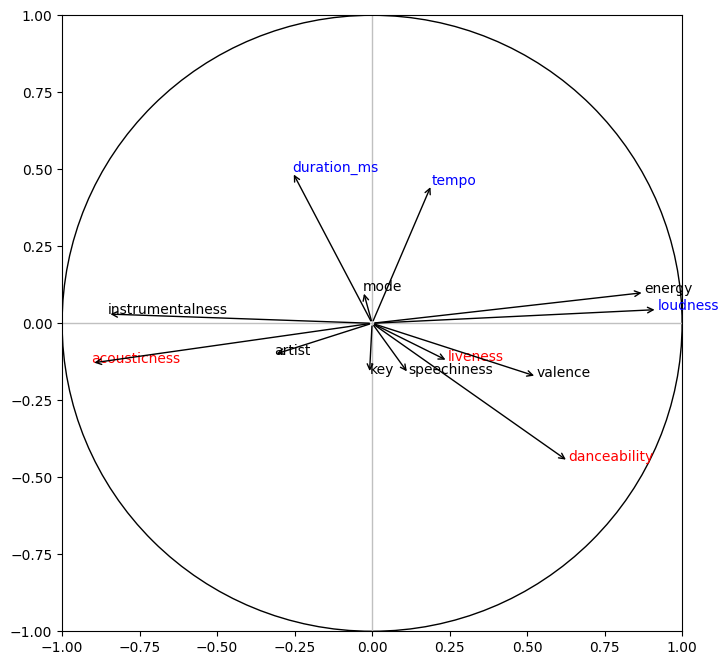

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Print the labels (variable names)
for col in data_scaled:
    if col in X_beak.columns: color="b"
    elif col in X_body.columns: color="r"
    else: color = "black"

    # Get coordinates in the two canonical components
    coord_horizontal = .5 * (corr_cc_var.at["U_1",col] + corr_cc_var.at["V_1",col])
    coord_vertical = .5 * (corr_cc_var.at["U_2",col] + corr_cc_var.at["V_2",col])
    plt.annotate(col,(coord_horizontal,coord_vertical), color=color)
    axes.annotate("", xy=(coord_horizontal,coord_vertical), xytext=(0, 0),arrowprops=dict(arrowstyle="->", color="black"))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

##### Interpret the obtained results

In [ ]:

##In ths circle we can see that the correlated variables are :
#-  loudness and energy
#-acousticness and instrumentalness


#and the most representative ones are :
# -danceability
#-loudness
#-energy
#-instrumentalness


#### Individual visualization

##### Show the individuals representation

[]

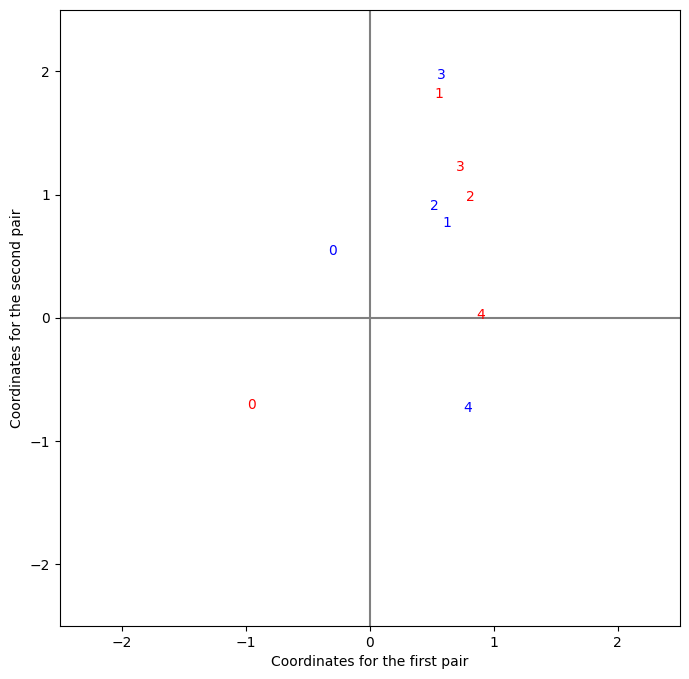

In [ ]:
from matplotlib.pyplot import figure
fig, axes = plt.subplots(figsize=(8,8))

# We can plot the first 5 samples in the dataset
# by their coordinates in the first group of variables (in blue)
# and their coordinates in the second group of variables (in red)
# to see how far the two groups place the same sample.
for i in range(5):
    plt.annotate(i, (U_[i,0],U_[i,1]), color="b")
    plt.annotate(i, (V_[i, 0],V_[i, 1]), color="r")

plt.xlabel('Coordinates for the first pair')
plt.ylabel('Coordinates for the second pair')

# Modify xlim and ylim out zoom in and out of the figure
coord = 2.5
plt.xlim(-coord,coord)
plt.ylim(-coord,coord)

plt.hlines(0, -coord, coord, color="grey")
plt.vlines(0, -coord, coord, color="grey")

plt.plot()

##### Interpret the obtained results

In [ ]:
# we can see that each variables have a different properties and the samples number 4 have the most value

### CCA Conclusion
Based on your visualizations, do you think it would be useful to use the CCA results to reduce the dimensionality of your dataset before applying some form of clustering method, like you did with PCA? Why / why not?

In [ ]:
#In our oppinion it is better to use te PCA results to reduce the dimensionality of our dataset before applying some form of clustering method
#As it gives better results than the CCA